In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPL_Soccer_MLR_LR.csv')
dataset

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.00,183.9,93.2,11.79
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.00,183.5,80.0,10.05
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.00,183.1,73.8,8.51
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.00,178.4,71.1,11.50


In [6]:
dataset = dataset.drop(columns=['PlayerName','Club','Height','Weight','PreviousClubCost','AgentCharges'])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DistanceCovered(InKms)  202 non-null    float64
 1   Goals                   202 non-null    float64
 2   MinutestoGoalRatio      202 non-null    float64
 3   ShotsPerGame            202 non-null    float64
 4   BMI                     202 non-null    float64
 5   Cost                    202 non-null    float64
 6   Score                   202 non-null    float64
dtypes: float64(7)
memory usage: 11.2 KB


In [8]:
dataset.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,BMI,Cost,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,22.955891,69.021782,13.507426
std,0.457976,1.800549,3.662989,1.362451,2.863933,32.565333,6.189826
min,3.800000,3.300000,35.900000,11.600000,16.750000,28.000000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,21.082500,43.850000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,22.720000,58.600000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,24.465000,90.350000,18.080000
max,6.720000,14.300000,59.700000,19.200000,34.420000,200.800000,35.520000


In [9]:
dataset.isnull().sum() #결측치확인

DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
BMI                       0
Cost                      0
Score                     0
dtype: int64

In [10]:
# Features와 target 나누기
features = dataset[dataset.columns[:-1]]
target = dataset[dataset.columns[-1]]

In [11]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    features, target, test_size = 0.2, random_state = 2021)

In [12]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

161
161
41
41


In [13]:
#정규분포를 따르는 경우 학습의 성능이 좋기 때문이 StandardScalar 적용

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# 모델 1) hidden layer = 1, node = 16, learning rate = 0.01

Seed 고정하여 반복해도 결과값 똑같게


In [14]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [15]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 10회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=1024, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 222.8124 - mape: 99.9961 - val_loss: 205.0067 - val_mape: 97.9789 - lr: 0.0100
Epoch 2/500
1/1 [==============================] - 0s 60ms/step - loss: 218.3582 - mape: 98.6899 - val_loss: 200.8312 - val_mape: 96.7567 - lr: 0.0100
Epoch 3/500
1/1 [==============================] - 0s 41ms/step - loss: 213.9980 - mape: 97.3932 - val_loss: 196.7204 - val_mape: 95.5436 - lr: 0.0100
Epoch 4/500
1/1 [==============================] - 0s 41ms/step - loss: 209.7235 - mape: 96.1075 - val_loss: 192.6979 - val_mape: 94.3335 - lr: 0.0100
Epoch 5/500
1/1 [==============================] - 0s 41ms/step - loss: 205.5384 - mape: 94.8241 - val_loss: 188.7439 - val_mape: 93.1257 - lr: 0.0100
Epoch 6/500
1/1 [==============================] - 0s 55ms/step - loss: 201.4447 - mape: 93.5486 - val_loss: 184.9429 - val_mape: 91.9252 - lr: 0.0100
Epoch 7/500
1/1 [==============================] - 0s 49ms/step - loss: 197.4157 - mape: 92.2720

In [16]:
#모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


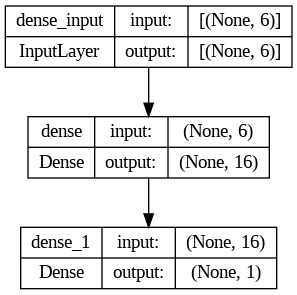

In [17]:
#모델 시각화
from keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [18]:
model.get_weights() 
# 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 화살표의 weight와 bias 값을 보여줌

[array([[ 0.9123397 ,  0.21844275,  0.3902254 ,  0.08254967, -0.81688267,
         -0.36553025, -0.1928043 , -0.1343494 ,  0.3838081 ,  0.30616084,
         -0.40638903, -0.514943  , -0.29027385,  0.28163752,  0.17437701,
          0.28348872],
        [ 0.58026785,  0.25158727,  0.02386202, -0.894699  , -0.00528641,
         -0.445111  ,  0.02280434, -0.0019479 ,  0.44143185,  0.18013172,
         -0.2587417 ,  0.35945913, -0.25952658, -0.08895065, -0.6750797 ,
          0.2454648 ],
        [ 1.0695311 ,  0.925136  , -0.0698188 , -0.6251711 , -0.36263812,
         -0.18299405, -0.39197582, -0.07504845,  0.14288628,  1.6399014 ,
         -0.27965286,  0.5583042 , -0.5577987 ,  1.9381416 ,  1.0441264 ,
          0.5151874 ],
        [-0.07734726,  0.075828  , -0.01103449,  0.09257919, -0.30947864,
          0.15278774, -0.4954862 ,  0.24599914,  0.05139994,  1.0373201 ,
         -0.02754508,  0.6660683 , -0.6813425 ,  1.0589643 ,  0.13303988,
          0.22107062],
        [-0.64271045

In [19]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.912340,0.218443,0.390225,0.082550,-0.816883,-0.365530,-0.192804,-0.134349,0.383808,0.306161,-0.406389,-0.514943,-0.290274,0.281638,0.174377,0.283489
1,0.580268,0.251587,0.023862,-0.894699,-0.005286,-0.445111,0.022804,-0.001948,0.441432,0.180132,-0.258742,0.359459,-0.259527,-0.088951,-0.675080,0.245465
2,1.069531,0.925136,-0.069819,-0.625171,-0.362638,-0.182994,-0.391976,-0.075048,0.142886,1.639901,-0.279653,0.558304,-0.557799,1.938142,1.044126,0.515187
3,-0.077347,0.075828,-0.011034,0.092579,-0.309479,0.152788,-0.495486,0.245999,0.051400,1.037320,-0.027545,0.666068,-0.681342,1.058964,0.133040,0.221071
4,-0.642710,0.136002,0.018162,-0.145249,0.306254,-0.598935,0.181935,-0.059225,-0.074279,-0.221890,-0.028642,0.320989,-0.644887,-0.463031,-0.016356,-0.383346
5,0.253100,-0.391120,0.029538,-0.743791,0.963071,0.895733,0.894875,0.018464,0.286769,-0.399655,-0.610254,0.761122,0.705336,-0.227477,0.351399,-0.046347


In [20]:
# training and validation metrics (loss and mape) of the model for each epoch during training
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [21]:
print(reg_history_dict['lr'])

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0

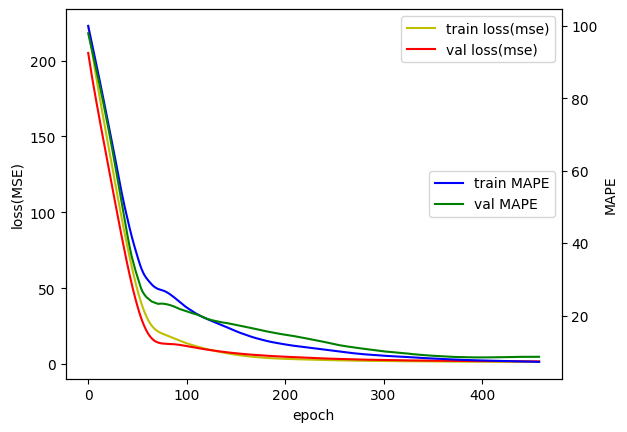

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

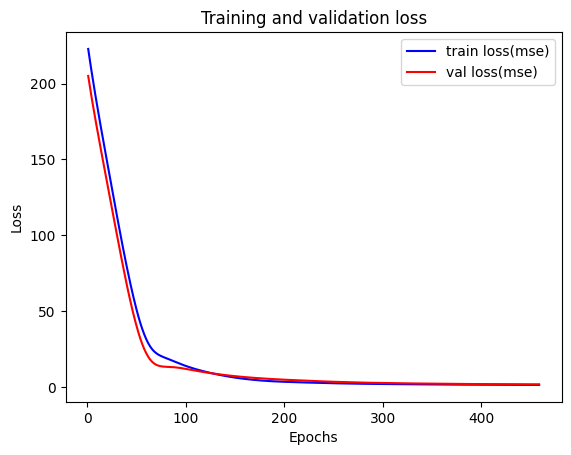

In [23]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

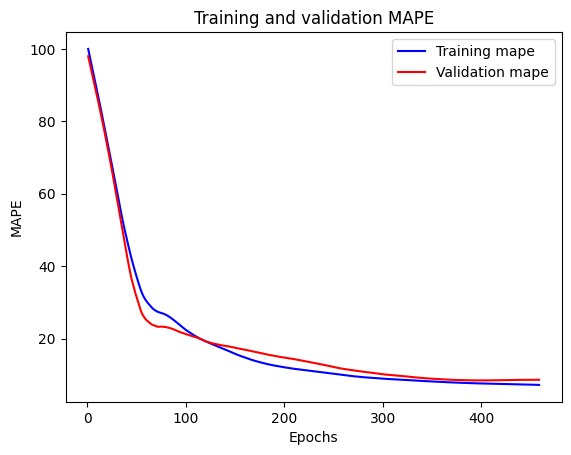

In [24]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [25]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 5ms/step


In [26]:
y_pred

array([[12.03281  ],
       [15.606532 ],
       [18.237501 ],
       [ 6.9838514],
       [ 6.2984495],
       [12.967304 ],
       [22.052864 ],
       [33.968815 ],
       [10.807481 ],
       [ 8.85756  ],
       [ 6.0041456],
       [15.28172  ],
       [23.272326 ],
       [10.658755 ],
       [ 9.1997595],
       [ 8.47868  ],
       [11.680075 ],
       [14.017888 ],
       [19.48312  ],
       [18.348152 ],
       [13.249286 ],
       [21.209715 ],
       [17.925508 ],
       [14.692287 ],
       [ 5.2326746],
       [ 7.9363575],
       [22.255827 ],
       [ 8.442846 ],
       [11.065253 ],
       [31.003025 ],
       [ 9.411606 ],
       [18.118359 ],
       [32.019085 ],
       [14.279504 ],
       [10.405691 ],
       [11.295728 ],
       [ 9.218011 ],
       [10.935809 ],
       [ 7.8583527],
       [14.735795 ],
       [17.592705 ]], dtype=float32)

In [27]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.922
test MSE: 3.193
tset MAPE: 0.105


# 모델 2-1)hidden layer =1, nodes =8, learning rate = 0.01

Seed 고정하여 반복해도 결과값 똑같게


In [28]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [29]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(8, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=1000, batch_size=1024, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 217.6432 - mape: 102.9057 - val_loss: 205.3620 - val_mape: 101.8067 - lr: 0.0100
Epoch 2/1000
1/1 [==============================] - 0s 74ms/step - loss: 214.0668 - mape: 101.7541 - val_loss: 202.0677 - val_mape: 100.7745 - lr: 0.0100
Epoch 3/1000
1/1 [==============================] - 0s 75ms/step - loss: 210.5401 - mape: 100.6094 - val_loss: 198.8043 - val_mape: 99.7543 - lr: 0.0100
Epoch 4/1000
1/1 [==============================] - 0s 71ms/step - loss: 207.0694 - mape: 99.4716 - val_loss: 195.5883 - val_mape: 98.7416 - lr: 0.0100
Epoch 5/1000
1/1 [==============================] - 0s 58ms/step - loss: 203.6484 - mape: 98.3438 - val_loss: 192.4282 - val_mape: 97.7384 - lr: 0.0100
Epoch 6/1000
1/1 [==============================] - 0s 41ms/step - loss: 200.2753 - mape: 97.2206 - val_loss: 189.3256 - val_mape: 96.7462 - lr: 0.0100
Epoch 7/1000
1/1 [==============================] - 0s 36ms/step - loss: 196.9444 - m

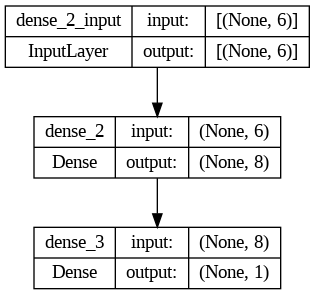

In [30]:
#모델 시각화
from keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [31]:
pd.DataFrame(model.get_weights()[0])

,0,1,2,3,4,5,6,7
0,0.504289,-0.065140,0.189214,0.196162,-0.969830,-0.205919,0.120056,-0.309530
1,0.512660,0.820465,-0.803091,0.575210,-0.483883,-0.424985,0.478441,-0.358041
2,1.101181,0.423566,-0.471245,1.830453,-0.178225,-0.033886,0.096514,0.017206
3,1.003033,0.328143,-0.479558,2.161221,-0.717934,0.360926,-0.586508,0.240158
4,0.263982,0.322454,-0.337852,0.532669,-0.840949,0.127287,0.035648,-0.422062
5,0.407216,0.544883,-0.261039,-0.247570,0.599476,1.691188,1.354437,-0.929179


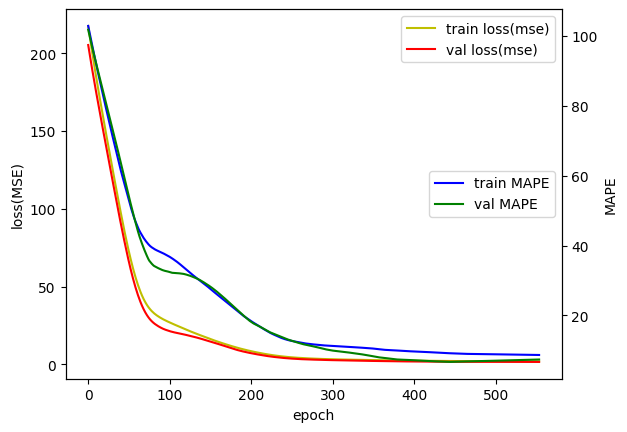

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

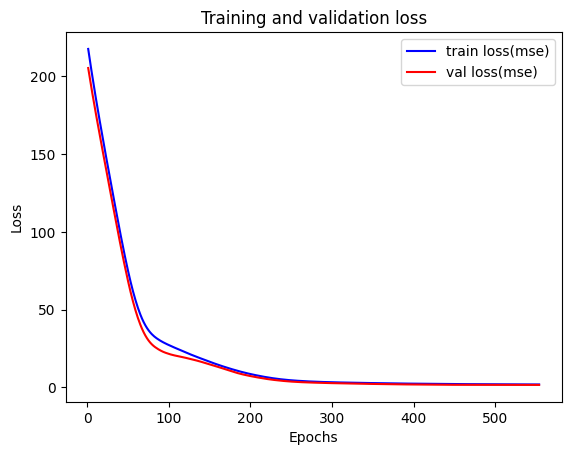

In [33]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

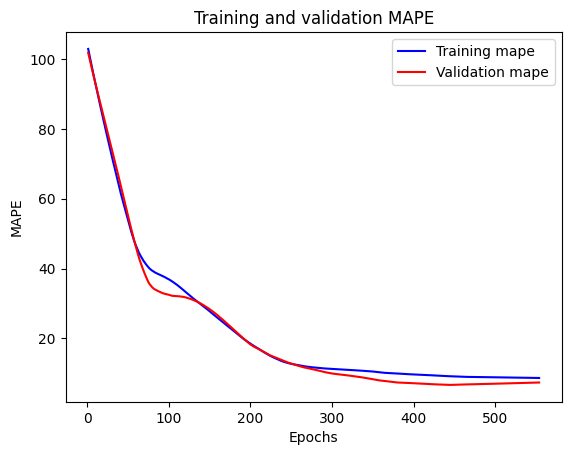

In [34]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [35]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 8ms/step


In [36]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.934
test MSE: 2.690
tset MAPE: 0.088


# 모델 2-2)hidden layer =1, nodes =8, learning rate = 0.1

In [37]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [38]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(8, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=1000, batch_size=1024, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/1000
1/1 [==============================] - 1s 798ms/step - loss: 217.6432 - mape: 102.9057 - val_loss: 177.2912 - val_mape: 92.7844 - lr: 0.1000
Epoch 2/1000
1/1 [==============================] - 0s 59ms/step - loss: 184.2623 - mape: 91.6926 - val_loss: 150.2168 - val_mape: 83.8311 - lr: 0.1000
Epoch 3/1000
1/1 [==============================] - 0s 44ms/step - loss: 155.6259 - mape: 81.3383 - val_loss: 124.8362 - val_mape: 75.0787 - lr: 0.1000
Epoch 4/1000
1/1 [==============================] - 0s 42ms/step - loss: 129.7839 - mape: 71.9933 - val_loss: 100.1548 - val_mape: 66.1276 - lr: 0.1000
Epoch 5/1000
1/1 [==============================] - 0s 65ms/step - loss: 104.8915 - mape: 63.0733 - val_loss: 76.2851 - val_mape: 56.5920 - lr: 0.1000
Epoch 6/1000
1/1 [==============================] - 0s 59ms/step - loss: 81.2634 - mape: 54.3360 - val_loss: 54.5795 - val_mape: 46.4023 - lr: 0.1000
Epoch 7/1000
1/1 [==============================] - 0s 45ms/step - loss: 60.6188 - mape: 

In [39]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7
0,-0.075818,-0.967834,0.665693,-0.149890,-0.724824,0.503973,0.084422,-0.720856
1,0.333455,0.205091,-2.342648,0.190266,-0.556455,-1.172025,0.365129,0.081160
2,0.340580,-0.537935,0.175892,-0.376897,-0.017409,0.162443,-0.004947,-0.488067
3,0.200278,-0.546323,0.109665,0.147939,-0.547476,0.626130,-0.724337,-0.253015
4,-0.113058,-0.645302,0.190296,0.308277,-0.930467,0.785844,-0.084083,-0.584082
5,0.591719,0.800156,-0.950016,-0.421839,0.919766,1.547685,1.932718,-0.894849


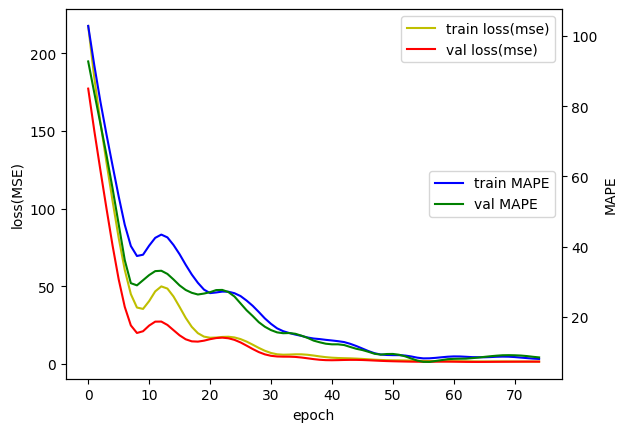

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

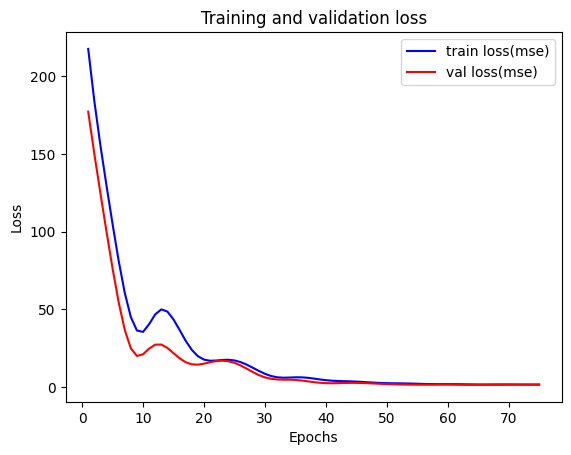

In [41]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

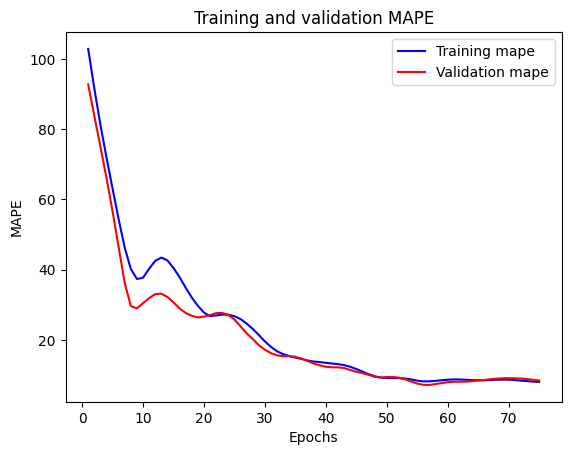

In [42]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [43]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 4ms/step


In [44]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.935
test MSE: 2.672
tset MAPE: 0.105


# 모델3-1)hidden layer = 2, nodes = 4,8, **learning** rate = 0.01

Seed 고정하여 반복해도 결과값 똑같게


In [45]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [46]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(4, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=1024, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 205.9505 - mape: 94.8309 - val_loss: 192.1393 - val_mape: 94.1578 - lr: 0.0100
Epoch 2/500
1/1 [==============================] - 0s 73ms/step - loss: 203.7599 - mape: 94.0178 - val_loss: 189.8430 - val_mape: 93.2991 - lr: 0.0100
Epoch 3/500
1/1 [==============================] - 0s 84ms/step - loss: 201.4265 - mape: 93.1543 - val_loss: 187.4189 - val_mape: 92.3880 - lr: 0.0100
Epoch 4/500
1/1 [==============================] - 0s 78ms/step - loss: 198.9442 - mape: 92.2324 - val_loss: 184.8600 - val_mape: 91.4274 - lr: 0.0100
Epoch 5/500
1/1 [==============================] - 0s 69ms/step - loss: 196.3162 - mape: 91.2569 - val_loss: 182.1821 - val_mape: 90.4206 - lr: 0.0100
Epoch 6/500
1/1 [==============================] - 0s 82ms/step - loss: 193.5547 - mape: 90.2290 - val_loss: 179.3843 - val_mape: 89.3715 - lr: 0.0100
Epoch 7/500
1/1 [==============================] - 0s 68ms/step - loss: 190.6499 - mape: 89.1475

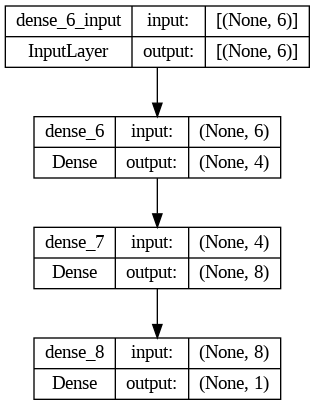

In [47]:
#모델 시각화
from keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [48]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3
0,0.512785,-0.497460,0.185284,-0.072461
1,-0.938324,-0.533990,0.850738,0.392549
2,0.559817,-0.837357,0.357108,-0.923386
3,0.495816,-0.856998,0.220586,-0.522785
4,0.978285,0.346920,-1.013533,0.553826
5,-0.094914,-0.384416,0.485224,0.866596


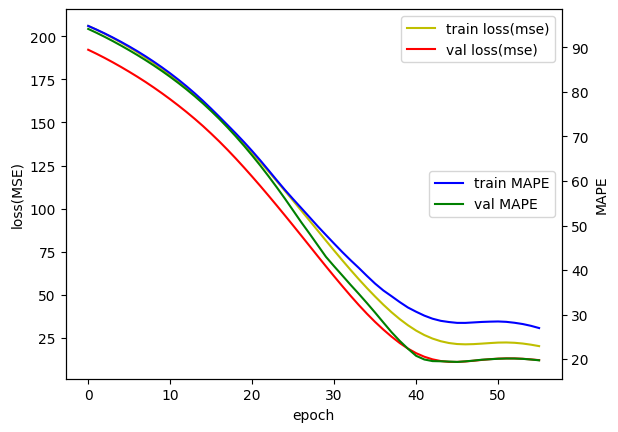

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

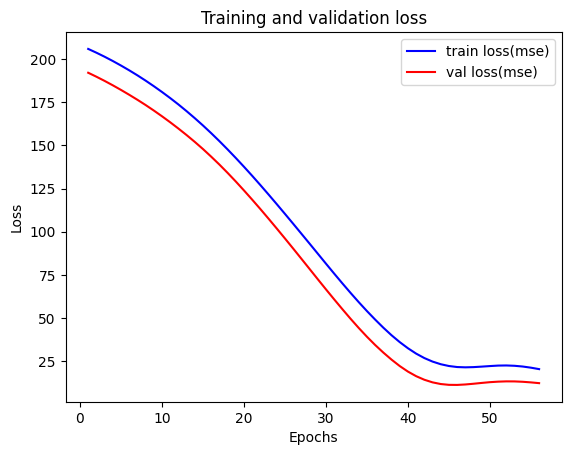

In [50]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

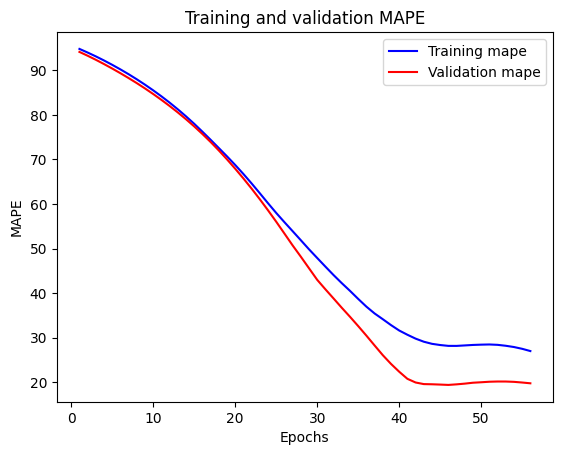

In [51]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [52]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 7ms/step


In [53]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.489
test MSE: 20.947
tset MAPE: 0.275


# 모델3-2)hidden layer = 2, nodes = 4,8, **learning** rate = 0.1

In [54]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [55]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(4, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=1024, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
1/1 [==============================] - 1s 940ms/step - loss: 205.9505 - mape: 94.8309 - val_loss: 166.9931 - val_mape: 84.5822 - lr: 0.1000
Epoch 2/500
1/1 [==============================] - 0s 48ms/step - loss: 177.8149 - mape: 84.2096 - val_loss: 130.2925 - val_mape: 69.6251 - lr: 0.1000
Epoch 3/500
1/1 [==============================] - 0s 60ms/step - loss: 139.1198 - mape: 68.6185 - val_loss: 85.0446 - val_mape: 48.5057 - lr: 0.1000
Epoch 4/500
1/1 [==============================] - 0s 75ms/step - loss: 94.6453 - mape: 51.0185 - val_loss: 42.0188 - val_mape: 33.7348 - lr: 0.1000
Epoch 5/500
1/1 [==============================] - 0s 43ms/step - loss: 55.9690 - mape: 41.8625 - val_loss: 17.3436 - val_mape: 27.8407 - lr: 0.1000
Epoch 6/500
1/1 [==============================] - 0s 45ms/step - loss: 35.2618 - mape: 38.9741 - val_loss: 26.4013 - val_mape: 37.2781 - lr: 0.1000
Epoch 7/500
1/1 [==============================] - 0s 43ms/step - loss: 45.3790 - mape: 46.6589 - va

In [56]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3
0,-0.035122,-0.170474,-0.262611,0.164996
1,-0.197717,-1.250979,0.218163,-0.034121
2,0.010969,-0.429025,0.497918,-0.382198
3,-0.105411,-0.561320,0.070846,-0.082312
4,0.354730,0.091191,-0.760475,0.184410
5,0.791310,-0.225735,1.189582,1.198403


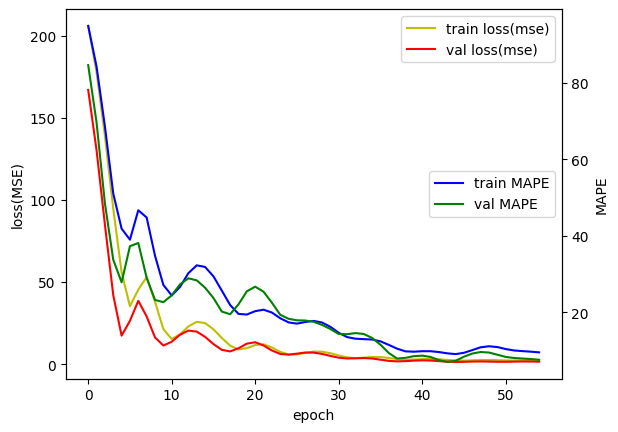

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

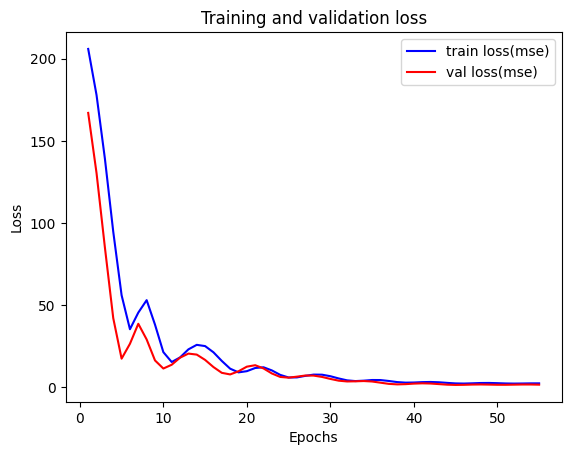

In [58]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

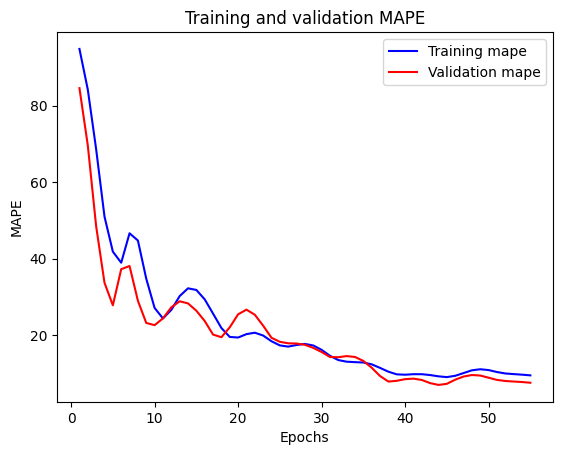

In [59]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [60]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 8ms/step


In [61]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.925
test MSE: 3.069
tset MAPE: 0.099


# 모델4-1 ) hidden layer = 2, node=8,8,learning rate = 0.01


Seed 고정하여 반복해도 결과값 똑같게


In [62]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [63]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(8, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=100, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
2/2 [==============================] - 1s 293ms/step - loss: 194.2332 - mape: 92.2957 - val_loss: 177.4855 - val_mape: 90.7729 - lr: 0.0100
Epoch 2/500
2/2 [==============================] - 0s 72ms/step - loss: 186.8009 - mape: 89.8745 - val_loss: 169.4706 - val_mape: 88.1781 - lr: 0.0100
Epoch 3/500
2/2 [==============================] - 0s 71ms/step - loss: 178.4853 - mape: 87.2125 - val_loss: 160.4383 - val_mape: 85.2169 - lr: 0.0100
Epoch 4/500
2/2 [==============================] - 0s 65ms/step - loss: 169.6110 - mape: 84.2140 - val_loss: 150.3957 - val_mape: 81.8660 - lr: 0.0100
Epoch 5/500
2/2 [==============================] - 0s 65ms/step - loss: 159.3641 - mape: 80.6920 - val_loss: 139.3269 - val_mape: 78.0798 - lr: 0.0100
Epoch 6/500
2/2 [==============================] - 0s 81ms/step - loss: 148.4548 - mape: 76.8125 - val_loss: 127.3182 - val_mape: 73.8206 - lr: 0.0100
Epoch 7/500
2/2 [==============================] - 0s 72ms/step - loss: 135.8131 - mape: 72.3

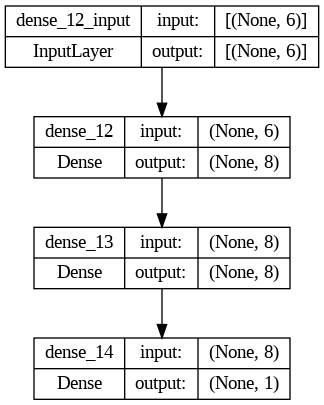

In [64]:
#모델 시각화
from keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [65]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7
0,0.046655,-0.176287,0.139822,0.101463,-0.432385,-0.024470,0.237378,-0.394762
1,0.574981,-0.363955,0.226642,-0.328802,0.143267,-0.231652,0.127646,0.246863
2,0.371401,0.445010,-0.338685,0.155041,0.117281,-0.255583,0.104332,0.250329
3,0.475865,0.400569,-0.531705,0.127233,-0.310116,0.216489,-0.521344,0.161828
4,0.326251,0.507946,-0.501826,-0.431294,0.266938,0.245141,0.105259,0.089470
5,0.347605,0.168698,0.216583,0.873840,-0.023098,0.887311,0.806171,0.445772


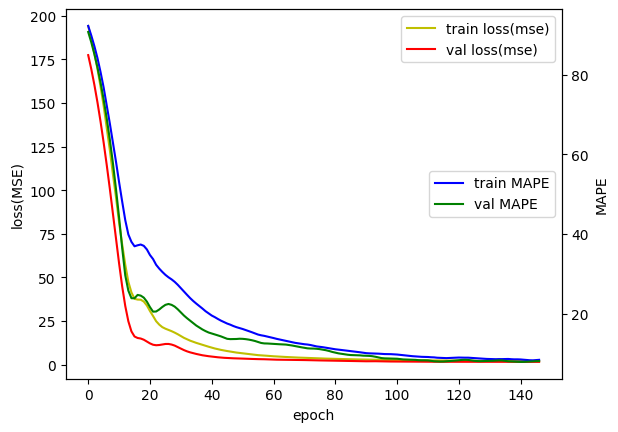

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

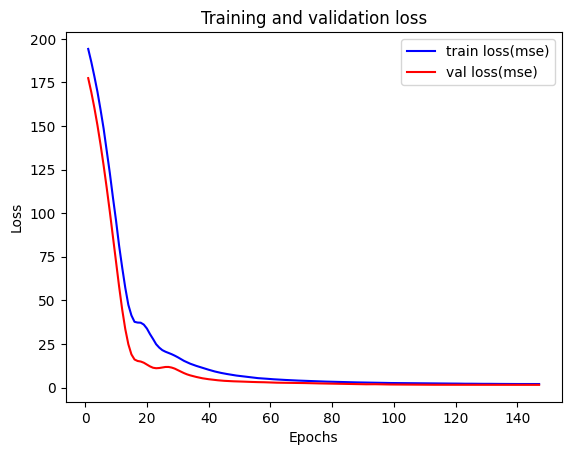

In [67]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

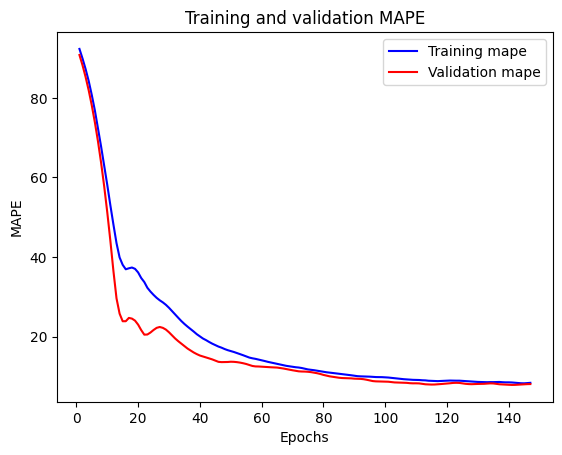

In [68]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [69]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 10ms/step


In [70]:
y_pred

array([[12.573452 ],
       [14.801479 ],
       [18.130808 ],
       [ 7.0956855],
       [ 6.110634 ],
       [13.081195 ],
       [22.936562 ],
       [34.592976 ],
       [11.924065 ],
       [ 8.712739 ],
       [ 6.794324 ],
       [15.341288 ],
       [23.111551 ],
       [10.66493  ],
       [ 9.2603   ],
       [ 9.134364 ],
       [11.97979  ],
       [13.882052 ],
       [19.049654 ],
       [17.952682 ],
       [13.358366 ],
       [19.758423 ],
       [18.222738 ],
       [15.232376 ],
       [ 5.677453 ],
       [ 8.305913 ],
       [22.465307 ],
       [ 8.200918 ],
       [10.16798  ],
       [30.6468   ],
       [ 9.25545  ],
       [16.967587 ],
       [31.912598 ],
       [15.140768 ],
       [11.279556 ],
       [13.951174 ],
       [ 9.199363 ],
       [11.960878 ],
       [ 7.478457 ],
       [15.70602  ],
       [16.986034 ]], dtype=float32)

In [71]:
# 성능평가
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.917
test MSE: 3.422
tset MAPE: 0.105


# 모델4-2 ) hidden layer = 2, node=8,8, learning rate = 0.1






In [72]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [73]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(8, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=100, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
2/2 [==============================] - 2s 283ms/step - loss: 184.8560 - mape: 89.0710 - val_loss: 81.0634 - val_mape: 54.6997 - lr: 0.1000
Epoch 2/500
2/2 [==============================] - 0s 66ms/step - loss: 84.9805 - mape: 52.9217 - val_loss: 30.5266 - val_mape: 30.7012 - lr: 0.1000
Epoch 3/500
2/2 [==============================] - 0s 72ms/step - loss: 59.8849 - mape: 44.7057 - val_loss: 18.0345 - val_mape: 23.6431 - lr: 0.1000
Epoch 4/500
2/2 [==============================] - 0s 43ms/step - loss: 35.2994 - mape: 35.8700 - val_loss: 15.3977 - val_mape: 24.3285 - lr: 0.1000
Epoch 5/500
2/2 [==============================] - 0s 83ms/step - loss: 22.1228 - mape: 29.6350 - val_loss: 17.3531 - val_mape: 27.3463 - lr: 0.1000
Epoch 6/500
2/2 [==============================] - 0s 63ms/step - loss: 19.5134 - mape: 27.1307 - val_loss: 11.7404 - val_mape: 22.4388 - lr: 0.1000
Epoch 7/500
2/2 [==============================] - 0s 71ms/step - loss: 14.5096 - mape: 23.7608 - val_lo

In [74]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7
0,-0.475604,-0.540169,0.055706,0.255476,-0.411088,0.229565,0.262250,-0.614154
1,0.508365,-0.224401,-0.023540,-0.366663,0.117325,-0.413210,-0.011331,0.224423
2,0.197481,0.232702,-0.310161,0.286505,0.184140,-0.172682,0.224763,0.292401
3,0.076839,0.065624,-0.572562,0.086842,-0.264635,0.426661,-0.447982,-0.086763
4,0.165699,0.452113,-0.393108,-0.388909,0.296221,0.520934,0.028499,0.023315
5,1.063001,0.473330,0.783711,1.529583,0.315704,1.057562,1.282424,1.211172


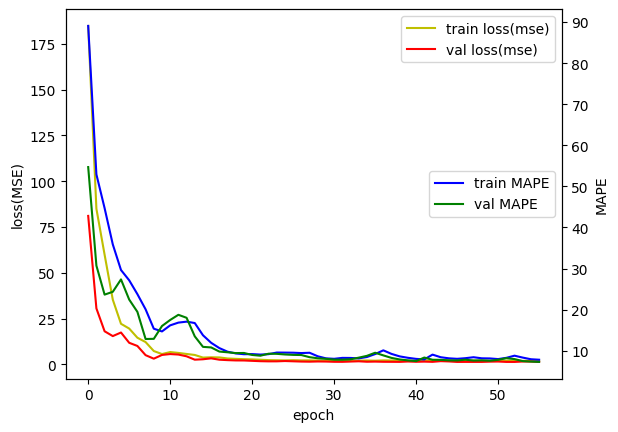

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

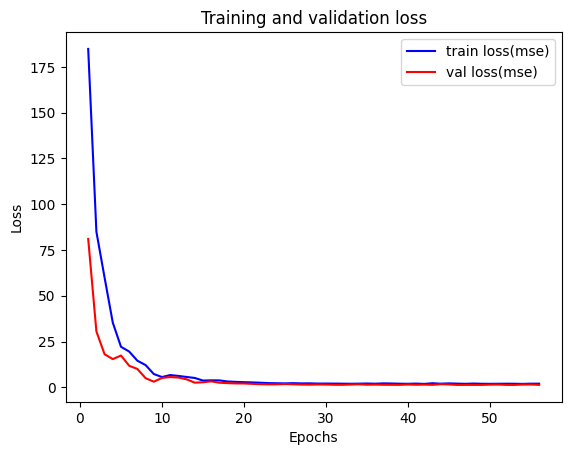

In [76]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

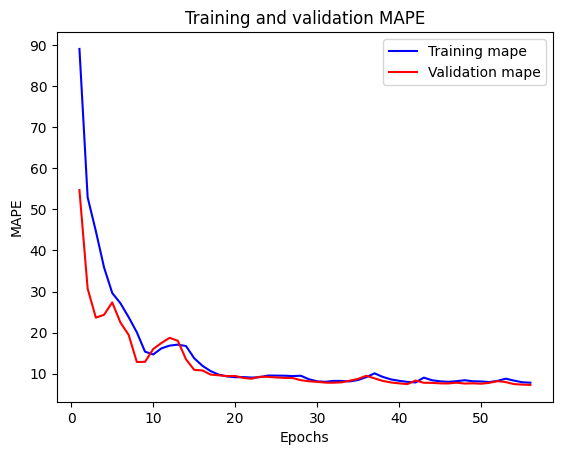

In [77]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [78]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 5ms/step


In [79]:
# 성능평가
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.927
test MSE: 2.978
tset MAPE: 0.090


# 모델5-1)hidden layer = 3, nodes 16,4,8, learning rate = 0.01

Seed 고정하여 반복해도 결과값 똑같게


In [80]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [81]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=100, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
2/2 [==============================] - 1s 198ms/step - loss: 210.5300 - mape: 97.3273 - val_loss: 194.4943 - val_mape: 95.2293 - lr: 0.0100
Epoch 2/500
2/2 [==============================] - 0s 34ms/step - loss: 204.0400 - mape: 94.8545 - val_loss: 187.0567 - val_mape: 92.2601 - lr: 0.0100
Epoch 3/500
2/2 [==============================] - 0s 34ms/step - loss: 196.2088 - mape: 91.7573 - val_loss: 177.9656 - val_mape: 88.4000 - lr: 0.0100
Epoch 4/500
2/2 [==============================] - 0s 43ms/step - loss: 186.9097 - mape: 87.7190 - val_loss: 167.1622 - val_mape: 83.5466 - lr: 0.0100
Epoch 5/500
2/2 [==============================] - 0s 33ms/step - loss: 175.9753 - mape: 82.4930 - val_loss: 154.6371 - val_mape: 77.5867 - lr: 0.0100
Epoch 6/500
2/2 [==============================] - 0s 37ms/step - loss: 163.4378 - mape: 76.2678 - val_loss: 140.4303 - val_mape: 70.2866 - lr: 0.0100
Epoch 7/500
2/2 [==============================] - 0s 41ms/step - loss: 149.2269 - mape: 69.5

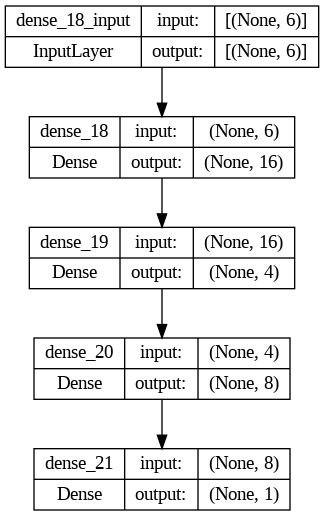

In [82]:
#모델 시각화
from keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [83]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.123431,-0.107715,0.122882,0.307856,-0.460514,-0.027155,0.198087,-0.058222,0.186993,-0.252857,0.214876,-0.371222,0.132294,-0.321692,0.148701,-0.076604
1,-0.091044,0.501982,-0.671987,0.150442,-0.055346,-0.355383,-0.018216,0.158142,0.403638,0.685732,-0.351857,-0.030399,-0.429489,-0.091642,-0.265419,0.222523
2,0.318771,0.295012,-0.324492,-0.103897,-0.087094,-0.069766,-0.149952,0.125308,-0.072529,-0.158914,-0.076668,0.309763,-0.293815,0.507344,0.416250,0.067062
3,-0.349421,-0.269579,-0.344346,0.559123,0.001505,0.313804,-0.195115,0.362062,-0.208215,0.260241,0.024415,0.405832,-0.412141,0.034665,-0.408268,-0.143387
4,-0.694279,0.389831,-0.416189,0.440219,0.274774,-0.596600,0.133298,-0.428935,-0.491410,0.173583,0.384090,0.315555,-0.426787,-0.173039,0.314357,0.022806
5,-0.612754,0.126702,0.401202,-0.941037,0.627304,0.099476,0.456314,0.540777,-0.215542,0.225488,0.058337,0.245380,0.075543,0.696093,-0.006675,0.495481


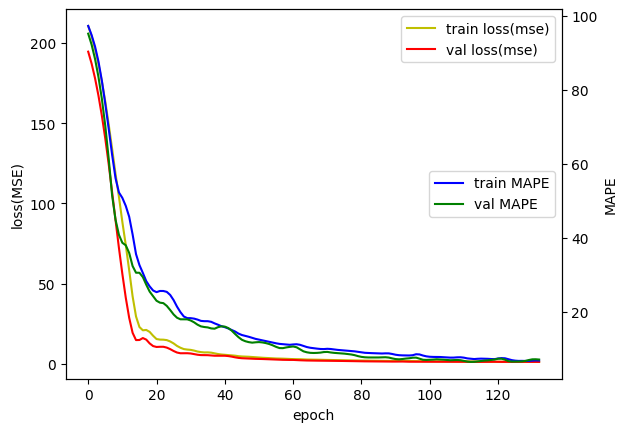

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

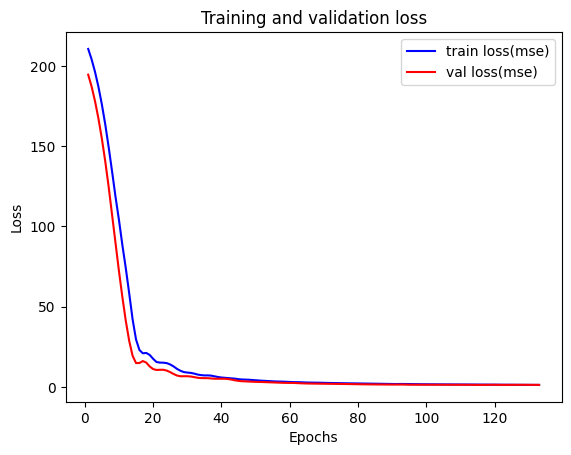

In [85]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

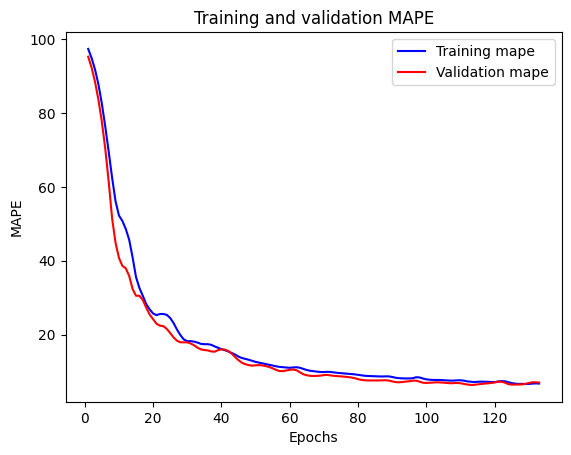

In [86]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [87]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 5ms/step


In [88]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.936
test MSE: 2.614
tset MAPE: 0.091


# 모델5-2)hidden layer = 3, nodes 16,4,8, learning rate = 0.1

In [89]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [90]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=100, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
2/2 [==============================] - 1s 220ms/step - loss: 201.2948 - mape: 92.4952 - val_loss: 95.0980 - val_mape: 48.0733 - lr: 0.1000
Epoch 2/500
2/2 [==============================] - 0s 35ms/step - loss: 124.8059 - mape: 63.2211 - val_loss: 18.1866 - val_mape: 31.1769 - lr: 0.1000
Epoch 3/500
2/2 [==============================] - 0s 53ms/step - loss: 29.8283 - mape: 33.9915 - val_loss: 23.8850 - val_mape: 35.7968 - lr: 0.1000
Epoch 4/500
2/2 [==============================] - 0s 33ms/step - loss: 32.9350 - mape: 39.2876 - val_loss: 26.5992 - val_mape: 38.6503 - lr: 0.1000
Epoch 5/500
2/2 [==============================] - 0s 40ms/step - loss: 31.7214 - mape: 41.2753 - val_loss: 20.1401 - val_mape: 34.2341 - lr: 0.1000
Epoch 6/500
2/2 [==============================] - 0s 56ms/step - loss: 23.5829 - mape: 36.5771 - val_loss: 15.7344 - val_mape: 28.2202 - lr: 0.1000
Epoch 7/500
2/2 [==============================] - 0s 36ms/step - loss: 21.0239 - mape: 29.8262 - val_l

In [91]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.251421,-0.360066,0.439925,-0.387005,-0.560211,-0.252269,-0.072096,-0.278004,-0.064533,-0.643864,-0.160264,-0.235399,0.121463,-0.700380,-0.111796,0.043219
1,0.339755,1.321790,-0.773875,0.358794,-0.101167,0.304190,0.262450,0.710576,0.631344,0.953320,-0.194326,1.100018,-0.221650,-0.106762,0.100021,0.502755
2,0.042467,0.065643,0.113605,-1.016472,-0.087482,-0.308808,-0.390828,-0.093808,-0.408170,-0.562608,-0.398031,0.543548,-0.200407,0.271313,0.128868,0.316335
3,-0.715429,-0.480682,-0.167926,-0.353825,-0.131171,0.090504,-0.413884,0.178983,-0.507836,-0.127335,-0.247656,0.582653,-0.414426,-0.143744,-0.683687,-0.083446
4,-0.216829,0.381954,-0.323727,-0.214734,0.202564,-0.913664,0.247495,-0.955019,-0.953670,-0.356471,0.142448,0.282037,-0.225858,-0.363946,0.023800,0.221467
5,0.574071,0.927176,0.865795,0.447616,1.456987,0.398665,1.210289,1.144706,0.491213,0.815077,0.307956,-0.484396,0.661116,1.392166,0.374829,1.342560


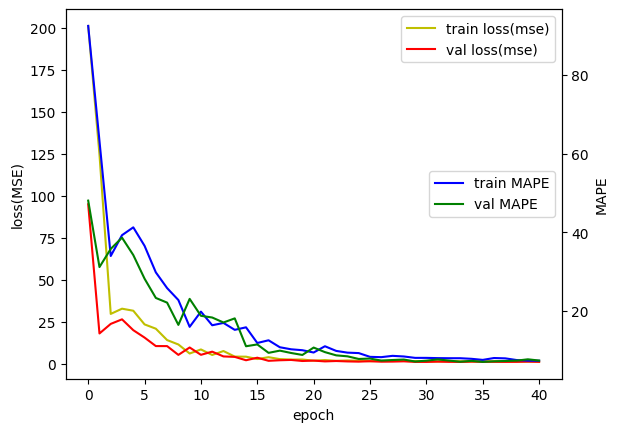

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

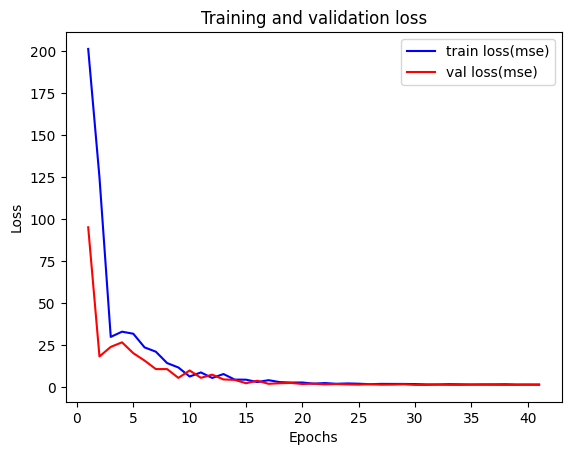

In [93]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

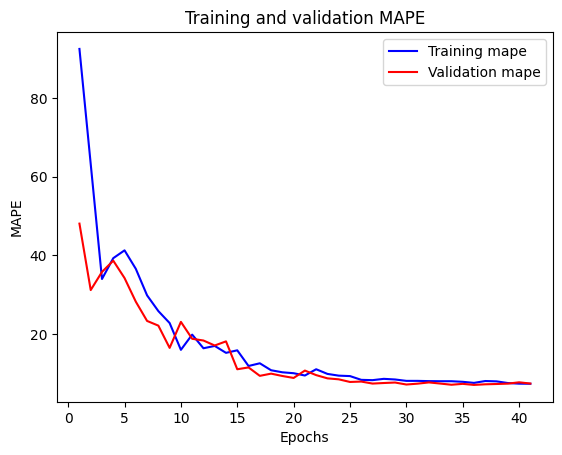

In [94]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [95]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 8ms/step


In [96]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.948
test MSE: 2.124
tset MAPE: 0.091


# 모델6-1 ) hidden layer = 3, node=16,4,4,learning rate = 0.01

Seed 고정하여 반복해도 결과값 똑같게


In [97]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [98]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=10, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
13/13 [==============================] - 1s 22ms/step - loss: 194.2473 - mape: 95.7826 - val_loss: 153.7433 - val_mape: 87.2595 - lr: 0.0100
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 118.6650 - mape: 75.2508 - val_loss: 52.4406 - val_mape: 50.7076 - lr: 0.0100
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 34.3366 - mape: 38.6988 - val_loss: 15.0639 - val_mape: 24.7298 - lr: 0.0100
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 21.4430 - mape: 26.9503 - val_loss: 10.3747 - val_mape: 19.2489 - lr: 0.0100
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 14.2052 - mape: 21.5630 - val_loss: 7.1377 - val_mape: 16.8276 - lr: 0.0100
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 10.3276 - mape: 19.4283 - val_loss: 5.1797 - val_mape: 15.4749 - lr: 0.0100
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 7.7029 - mape: 17.5313 - 

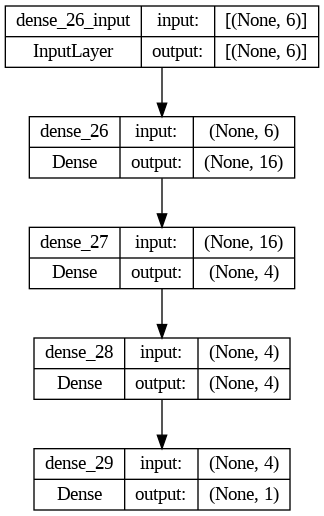

In [99]:
#모델 시각화
from keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [100]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.140838,-0.199111,0.011634,-0.329483,-0.525269,-0.013447,0.208697,-0.118693,0.271123,-0.211208,0.338193,-0.363441,0.031813,-0.221111,0.326704,-0.136745
1,-0.210279,0.381379,-0.362870,0.041916,0.013682,-0.277897,-0.007360,0.143411,0.489616,0.458928,-0.357321,0.081367,-0.258787,-0.061875,-0.227588,0.246705
2,0.372868,0.393955,-0.366262,-0.937413,-0.209840,-0.112255,-0.136556,0.038833,0.009069,-0.042188,0.042544,0.381126,-0.331119,0.476699,0.524198,-0.001316
3,-0.232496,-0.115883,-0.403229,-0.431873,-0.175812,0.211292,-0.275518,0.203913,-0.190545,0.348234,-0.082089,0.310761,-0.491308,-0.073809,-0.451112,-0.304631
4,-0.632061,0.233913,-0.454413,0.044103,0.305099,-0.479126,0.195709,-0.279661,-0.209949,0.035721,0.239467,0.252785,-0.417657,-0.083816,0.080562,-0.062371
5,-0.646591,-0.324476,0.699294,0.272042,0.556030,0.344527,0.452070,0.560410,-0.164910,-0.055553,0.173613,0.406356,0.177843,0.762263,0.070905,0.544678


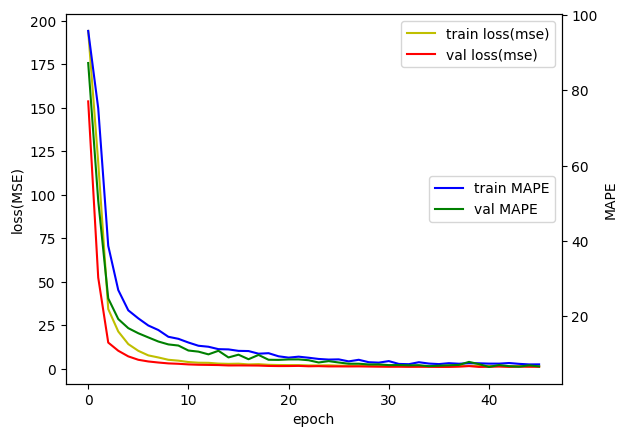

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

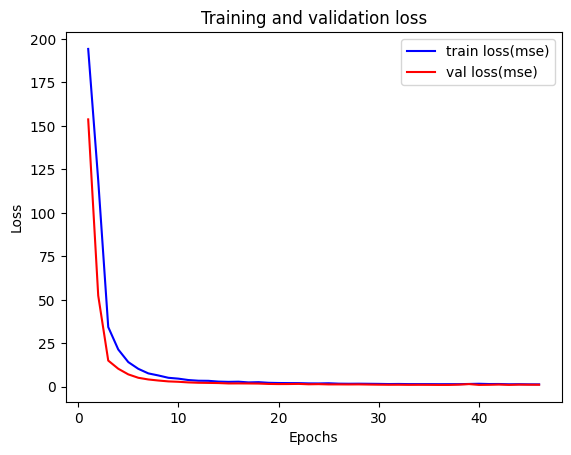

In [102]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

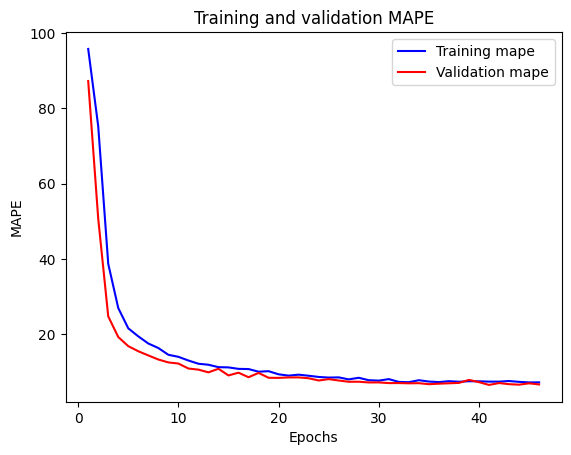

In [103]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [104]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 5ms/step


In [105]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.938
test MSE: 2.529
tset MAPE: 0.090


# 모델6-2 ) hidden layer = 3, node=16,4,4,learning rate = 0.1

In [106]:
#출처: https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

In [107]:
# Network 구조 형성
import tensorflow as tf
from keras import models
from keras import layers

#Seed 고정하여 반복해도 결과값 똑같게
tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개
# Structure에는 정답이 없고 규칙만 있음. 다양하게 시도해보세요!

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# Loss = difference betweeen predicted value and actual value
# Metric = evaluate the performance of the model during training and testing
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback = 학습에 관한 조절. specify certain actions to be taken during training, such as saving / stopping / changing
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # 5회 이상 안나아지면 Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # min_lr에 factor 곱하는 방향으로 learning rate 조절
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53


# Modeling
reg_history = model.fit(train_features, train_target, epochs=500, batch_size=10, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/500
13/13 [==============================] - 2s 28ms/step - loss: 70.0913 - mape: 50.0007 - val_loss: 22.6133 - val_mape: 26.1320 - lr: 0.1000
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 10.3356 - mape: 19.6508 - val_loss: 9.4144 - val_mape: 20.5960 - lr: 0.1000
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 6.1847 - mape: 17.3888 - val_loss: 3.0743 - val_mape: 10.6690 - lr: 0.1000
Epoch 4/500
13/13 [==============================] - 0s 7ms/step - loss: 3.7411 - mape: 10.6967 - val_loss: 2.1413 - val_mape: 9.1144 - lr: 0.1000
Epoch 5/500
13/13 [==============================] - 0s 8ms/step - loss: 3.0483 - mape: 12.3046 - val_loss: 1.7733 - val_mape: 9.3800 - lr: 0.1000
Epoch 6/500
13/13 [==============================] - 0s 9ms/step - loss: 2.6215 - mape: 9.4658 - val_loss: 1.5172 - val_mape: 8.5450 - lr: 0.1000
Epoch 7/500
13/13 [==============================] - 0s 7ms/step - loss: 5.5877 - mape: 12.9780 - val_loss: 1.82

In [108]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.375060,-0.135872,0.245511,0.337233,-0.357262,0.009100,0.281996,-0.088212,0.247447,-0.582629,0.321832,-0.469481,0.125514,-0.324959,0.377189,-0.112931
1,-0.493679,0.096569,-0.083844,-1.428606,0.004753,-0.270234,-0.113141,0.193461,0.355310,0.175911,-0.680397,-0.596244,-0.064555,-0.092972,-0.206923,0.166205
2,-0.000445,-0.160795,-0.184186,0.204386,0.025809,0.211965,0.020344,0.204347,0.170263,-0.306412,0.184144,0.580841,-0.089998,0.537152,0.711248,0.090785
3,-0.209779,-0.698854,-0.338929,0.679606,-0.066930,0.284410,-0.103088,0.296326,-0.009085,-0.061305,0.062947,0.256824,-0.261024,-0.709899,-0.832733,-0.330506
4,0.459046,-0.056531,-0.091129,0.089768,0.198886,-0.390496,-0.116597,-0.376989,-0.374211,-0.270106,0.661532,-0.027127,-0.457571,-0.589075,-0.143368,-0.041736
5,-0.610988,-0.113158,1.222715,-1.395504,1.099641,1.315126,0.552112,1.143441,0.267154,1.216336,0.331033,0.460684,0.358328,1.404822,0.150825,1.234775


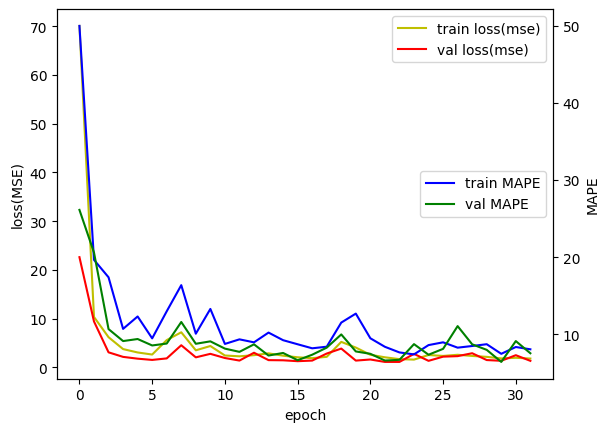

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='right')
plt.show()

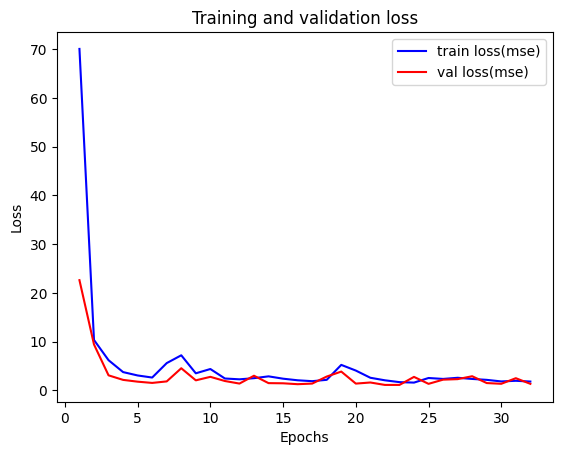

In [110]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='train loss(mse)')
plt.plot(epochs, val_loss, label='val loss(mse)', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

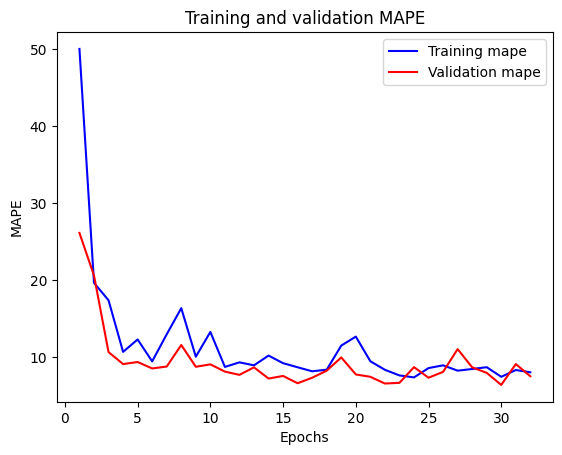

In [111]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [112]:
# 예측
y_pred = model.predict(test_features)

2/2 [==============================] - 0s 4ms/step


In [113]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))

test R squared: 0.948
test MSE: 2.120
tset MAPE: 0.093
